### Interactive Foreground Extraction using GrabCut Algorithm
Learn to extract foreground with GrabCut algorithm

#### 목표
In this chapter

* We will see GrabCut algorithm to extract foreground in images
* We will create an interactive application for this.

#### 이론
GrabCut 알고리즘은 영국의 Microsoft Research의 Carsten Rother, Vladimir Kolmogorov 및 Andrew Blake가 설계했습니다. 그들의 논문에서, ["GrabCut": 반복 그래프 컷을 사용한 대화 형 전경 추출.](https://dl.acm.org/citation.cfm?id=1015720) 최소한의 사용자 상호 작용으로 전경 추출을위한 알고리즘이 필요했으며 결과는 GrabCut이었습니다.

그것은 사용자 관점에서 어떻게 작동합니까? 처음에는 사용자가 전경 영역 주위에 직사각형을 그립니다 (전경 영역은 직사각형 내부에 있어야합니다). 그런 다음 알고리즘을 반복적으로 분할하여 최상의 결과를 얻습니다. 끝난. 그러나 어떤 경우에는 세분화가 좋지 않을 것입니다. 예를 들어 전경 영역을 배경으로 표시하거나 그 반대로 표시 할 수 있습니다. 이 경우 사용자는 미세한 터치 업을 수행해야합니다. 몇 가지 잘못된 결과가있는 이미지에 약간의 스트로크를 주면됩니다. 스트로크는 기본적으로 다음과 같이 말합니다. "이 지역은 전경이되어야합니다. 배경을 표시했거나 다음 반복에서 수정해야합니다." 그런 다음 다음 반복에서 더 나은 결과를 얻을 수 있습니다.

아래 이미지를 참조하십시오. 첫 번째 선수와 축구는 파란색 직사각형으로 묶여 있습니다. 그런 다음 흰색 선 (전경 표시)과 검정 선 (배경 표시)이있는 일부 최종 수정이 수행됩니다. 그리고 우리는 좋은 결과를 얻습니다.

![](grabcut_output1.jpg)
배경에서는 어떤 일이 발생합니까?

사용자가 사각형을 입력합니다. 이 사각형 밖의 모든 것은 확실한 배경으로 취해질 것입니다 (사각형이 모든 객체를 포함해야한다는 것은 이전에 언급 된 이유입니다). 직사각형 안의 모든 것이 알려지지 않았습니다. 마찬가지로 포어 그라운드와 배경을 지정하는 사용자 입력은 하드 라벨링으로 간주되며 이는 프로세스에서 변경되지 않음을 의미합니다.
컴퓨터는 우리가 제공 한 데이터에 따라 초기 레이블링을 수행합니다. 전경 및 배경 픽셀을 레이블링합니다 (또는 하드 레이블)
이제 Gaussian Mixture Model (GMM)을 사용하여 전경과 배경을 모델링합니다.
우리가 제공 한 데이터에 따라 GMM은 새로운 픽셀 분포를 학습하고 생성합니다. 즉, 알 수없는 픽셀은 색상 통계와 관련하여 다른 하드 라벨링 된 픽셀과의 관계에 따라 가능한 전경색 또는 가능한 배경으로 레이블이 지정됩니다 (클러스터링과 유사 함).
이 픽셀 분포에서 그래프가 만들어집니다. 그래프의 노드는 픽셀입니다. 소스 노드 와 싱크 노드가 추가로 두 개 추가됩니다 . 모든 전경 픽셀은 소스 노드에 연결되고 모든 배경 픽셀은 싱크 노드에 연결됩니다.
픽셀을 소스 노드 / 엔드 노드에 연결하는 에지의 가중치는 픽셀이 전경 / 배경 일 확률에 의해 정의됩니다. 픽셀 간의 가중치는 에지 정보 또는 픽셀 유사성에 의해 정의됩니다. 픽셀 색에 큰 차이가 있으면 그 둘 사이의 가장자리가 가벼워집니다.
그런 다음 그래프를 세분화하기 위해 mincut 알고리즘이 사용됩니다. 그래프를 최소 비용 함수를 갖는 2 개의 소스 노드와 싱크 노드로 분리합니다. 비용 함수는 절단 된 모서리의 모든 가중치의 합입니다. 절단 후 소스 노드에 연결된 모든 픽셀은 전경이되고 싱크 노드에 연결된 픽셀은 모두 배경이됩니다.
이 과정은 분류가 수렴 될 때까지 계속됩니다.
아래 이미지에 설명되어 있습니다 (이미지 제공 : http://www.cs.ru.ac.za/research/g02m1682/ )
![](grabcut_scheme.jpg)

#### Demo
이제 우리는 OpenCV로 grabcut 알고리즘을 사용합니다. OpenCV에는이 함수 인 [cv.grabCut()](https://docs.opencv.org/3.4/d7/d1b/group__imgproc__misc.html#ga909c1dda50efcbeaa3ce126be862b37f) 이 있습니다. 우리는 먼저 그것의 주장을 볼 것입니다 :

img - 이미지 입력
마스크 - 우리가 배경, 전경 또는 가능한 배경 / 전경 등 그것은 다음과 같은 플래그에 의해 수행되는 영역을 지정 마스크 이미지 [cv.GC_BGD](https://docs.opencv.org/3.4/d7/d1b/group__imgproc__misc.html#ggad43d3e4208d3cf025d8304156b02ba38a889f1ce109543e8aed80a7abbc6dcb39) , [cv.GC_FGD](https://docs.opencv.org/3.4/d7/d1b/group__imgproc__misc.html#ggad43d3e4208d3cf025d8304156b02ba38a4757c1f0587bcf6e53e86dee7689a649) , [cv.GC_PR_BGD](https://docs.opencv.org/3.4/d7/d1b/group__imgproc__misc.html#ggad43d3e4208d3cf025d8304156b02ba38af748414821c7f39fab3493f9eed1eedf) , [cv.GC_PR_FGD](https://docs.opencv.org/3.4/d7/d1b/group__imgproc__misc.html#ggad43d3e4208d3cf025d8304156b02ba38ad33184b73cb87e08d29e0a3411b7c863) , 또는 단순히 통과 이미지에 0,1,2,3.
rect - 포 그라운드 객체를 (x, y, w, h) 형식으로 포함하는 사각형의 좌표입니다.
bdgModel , fgdModel - 알고리즘에 의해 내부적으로 사용되는 배열입니다. 방금 두 개의 np.float64 유형 제로 배열 크기 (1,65)를 만듭니다.
iterCount - 알고리즘이 실행해야하는 반복 수입니다.
mode - [cv.GC_INIT_WITH_RECT](https://docs.opencv.org/3.4/d7/d1b/group__imgproc__misc.html#ggaf8b5832ba85e59fc7a98a2afd034e558a5f8853c1e5a89c4aa2687d1f78a7e550) 또는 [cv.GC_INIT_WITH_MASK](https://docs.opencv.org/3.4/d7/d1b/group__imgproc__misc.html#ggaf8b5832ba85e59fc7a98a2afd034e558ab01527c7effb50fd1c54d8c4e671ed22) 가 아니면 직사각형 또는 최종 터치 업 스트로크를 그리는 지 여부를 결정하는 조합 이어야합니다 .
먼저 직사각형 모드를 봅시다. 이미지를로드하고 비슷한 마스크 이미지를 만듭니다. 우리는 fgdModel 과 bgdModel을 생성 합니다. 우리는 사각형 매개 변수를 제공합니다. 그것은 모두 똑바로합니다. 알고리즘을 5 회 반복하도록하십시오. 우리는 사각형을 사용하기 때문에 모드는 cv.GC_INIT_WITH_RECT 여야합니다 . 그런 다음 그래브 컷을 실행하십시오. 마스크 이미지를 수정합니다. 새 마스크 이미지에서 픽셀은 위에서 지정한 배경 / 전경을 나타내는 네 개의 플래그로 표시됩니다. 따라서 마스크를 수정하여 모든 0 픽셀과 2 픽셀을 0 (배경)으로, 모든 1 픽셀과 3 픽셀을 1 (예 : 전경 픽셀)로 설정합니다. 이제 우리의 마지막 마스크가 준비되었습니다. 세그먼트 이미지를 얻으려면 입력 이미지를 곱하면됩니다.

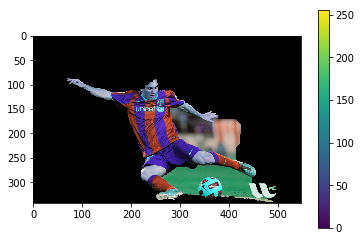

(<matplotlib.image.AxesImage at 0x1cd1891ddd8>,
 None)

In [5]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

%matplotlib inline

img  = cv.imread('messi5.jpg')
mask = np.zeros(img.shape[:2],np.uint8)

bgdModel = np.zeros((1,65), np.float64)
fgdModel = np.zeros((1,65) ,np.float64)
rect     = (50, 50, 450, 290)

cv.grabCut(img,mask, rect, bgdModel, fgdModel, 5, cv.GC_INIT_WITH_RECT)

mask2 = np.where((mask == 2) | (mask == 0 ) , 0, 1).astype('uint8')
img   = img*mask2[:, :, np.newaxis]

plt.imshow(img),plt.colorbar(),plt.show()

죄송합니다. 메시의 머리카락은 사라졌습니다. 메시의 머리카락은 누가 좋아하나요? 우리는 그것을 다시 가져와야합니다. 그래서 우리는 1 픽셀 (확실한 포 그라운드)의 미세한 터치 업을 제공 할 것입니다. 동시에, 우리가 원하지 않는 땅의 일부와 로고가 생겼습니다. 우리는 그들을 제거해야합니다. 0 픽셀 터치 업 (확실한 배경)이 있습니다. 그래서 이전 사례에서 우리가 말했던 것처럼 결과 마스크를 수정합니다.

내가 실제로 한 것은 페인트 응용 프로그램에 입력 이미지를 열고 이미지에 다른 레이어를 추가 한 것입니다. 페인트에 브러쉬 도구를 사용하여이 새로운 레이어에 검은 색으로 흰색 및 원치 않는 배경 (예 : 로고, 땅 등)이있는 누락 된 전경 (머리, 신발, 공 등)을 표시했습니다. 남은 배경을 회색으로 채 웁니다. 그런 다음 마스크 이미지를 OpenCV에로드하고 새로 추가 된 마스크 이미지에서 해당 값을 가진 편집 된 원본 마스크 이미지를 편집합니다. 아래 코드를 확인하십시오.


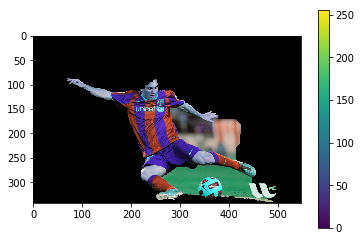

(<matplotlib.image.AxesImage at 0x1cd189e9278>,
 None)

In [6]:
# newmask is the mask image I manually labelled
newmask = cv.imread('newmask.png',0)
# wherever it is marked white (sure foreground), change mask=1
# wherever it is marked black (sure background), change mask=0
mask[newmask == 0] = 0
mask[newmask == 255] = 1
mask, bgdModel, fgdModel = cv.grabCut(img,mask,None,bgdModel,fgdModel,5,cv.GC_INIT_WITH_MASK)
mask = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img = img*mask[:,:,np.newaxis]
plt.imshow(img),plt.colorbar(),plt.show()

그게 전부입니다. 여기서 rect 모드로 초기화하는 대신 마스크 모드로 직접 이동할 수 있습니다. 마스크 이미지의 사각형 영역을 2 픽셀 또는 3 픽셀 (가능한 배경 / 전경)으로 표시하면됩니다. 그런 다음 두 번째 예제에서와 같이 sure_foreground를 1- 픽셀로 표시하십시오. 그런 다음 마스크 모드와 함께 grabCut 함수를 직접 적용하십시오.

#### 추가 리소스
#### 수업 과정
1. OpenCV 샘플에는 grabcut을 사용하는 대화식 도구 인 grabcut.py 샘플이 있습니다. 확인해 봐. 또한 그것을 사용하는 방법에 대한 이 YouTube 동영상 을 시청 하십시오.
2. 여기에서는 마우스로 직사각형과 획을 그리는 대화 형 샘플로 만들거나 스트로크 폭을 조정할 수있는 트랙 바를 만들 수 있습니다.